 ## Pre-processing and Training Data Development

- Goal is to create a cleaned development dataset you can use to complete the modeling step of this project. 

In [1]:
# Import pandas
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two'

In [3]:
df = pd.read_csv("data/Quora_cleaned.csv")

In [4]:
df.head(5)

,Unnamed: 0,qid,question_stemmed,target,question_length,total_words
0,393959,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12
1,118298,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26
2,1004888,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29
3,460851,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32
4,543322,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016694 entries, 0 to 1016693
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Unnamed: 0        1016694 non-null  int64 
 1   qid               1016694 non-null  object
 2   question_stemmed  1016694 non-null  object
 3   target            1016694 non-null  int64 
 4   question_length   1016694 non-null  int64 
 5   total_words       1016694 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 46.5+ MB


In [6]:
# Drop index columns
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(2)

,qid,question_stemmed,target,question_length,total_words
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26


In [7]:
# Print the data type of each column
print(df.dtypes)

qid                 object
question_stemmed    object
target               int64
question_length      int64
total_words          int64
dtype: object


### Standardize the magnitude of numeric features using a scaler

In [8]:
# Find the average length of word
df['avg_word_length'] = df['question_length'] / df['total_words']

# Print the first 5 rows of these columns
print(df[['question_stemmed', 'question_length', 'total_words', 'avg_word_length']].head(5))

                                    question_stemmed  question_length  \
0  prospects international students httpwwwophamm...              240   
1  could probing quantum world vacuum virtual par...              221   
2  mention good book containing quotations great ...              219   
3  didnt genghiz khan thee great khan abolish des...              218   
4  india harbor many scammers thieves con artists...              218   

   total_words  avg_word_length  
0           12        20.000000  
1           26         8.500000  
2           29         7.551724  
3           32         6.812500  
4           27         8.074074  


In [9]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int64','float'])
print(numeric_df.columns)

Index(['target', 'question_length', 'total_words', 'avg_word_length'], dtype='object')


In [10]:
numeric_df['avg_word_length'].describe()

count    1.016694e+06
mean     6.680972e+00
std      1.129022e+00
min      1.933333e+00
25%      6.000000e+00
50%      6.615385e+00
75%      7.375000e+00
max      5.300000e+01
Name: avg_word_length, dtype: float64

In [11]:
# Create subset of only the categorical variable columns
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['qid', 'question_stemmed'], dtype='object')


In [12]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(numeric_df[['avg_word_length']])

# Transform the data using the fitted scaler
numeric_df['avg_word_length_SS'] = SS_scaler.transform(numeric_df[['avg_word_length']])

# Compare the origional and transformed column
print(numeric_df[['avg_word_length_SS', 'avg_word_length']].head(5))

   avg_word_length_SS  avg_word_length
0           11.796965        20.000000
1            1.611155         8.500000
2            0.771245         7.551724
3            0.116498         6.812500
4            1.233902         8.074074


C:\Users\gosal\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


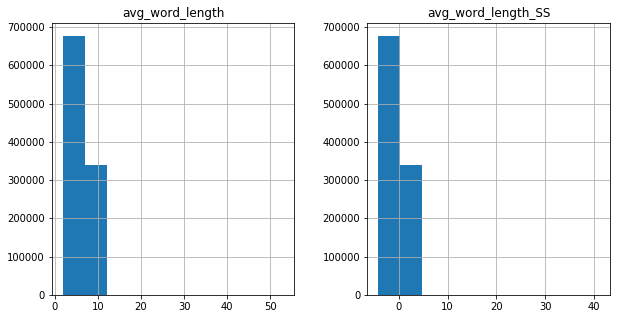

In [13]:
# Create a histogram for the 2 
plt.rcParams["figure.figsize"] = (10,5)

numeric_df.hist(['avg_word_length','avg_word_length_SS'])
plt.show()

In [14]:
# Drop non scaled column
numeric_df.drop(columns='avg_word_length', inplace=True)
numeric_df.head(5)

C:\Users\gosal\Anaconda3_2\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,target,question_length,total_words,avg_word_length_SS
0,0,240,12,11.796965
1,0,221,26,1.611155
2,0,219,29,0.771245
3,1,218,32,0.116498
4,1,218,27,1.233902


In [15]:
numeric_df['avg_word_length_SS'].describe()

count    1.016694e+06
mean    -2.911209e-14
std      1.000000e+00
min     -4.205091e+00
25%     -6.031520e-01
50%     -5.809188e-02
75%      6.147167e-01
max      4.102581e+01
Name: avg_word_length_SS, dtype: float64

In [16]:
df_numeric_scaled = pd.concat([categorical_df, numeric_df], axis=1, sort=False)
df_numeric_scaled.head(5)

,qid,question_stemmed,target,question_length,total_words,avg_word_length_SS
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12,11.796965
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26,1.611155
2,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29,0.771245
3,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32,0.116498
4,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27,1.233902


In [17]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016694 entries, 0 to 1016693
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   qid                 1016694 non-null  object 
 1   question_stemmed    1016694 non-null  object 
 2   target              1016694 non-null  int64  
 3   question_length     1016694 non-null  int64  
 4   total_words         1016694 non-null  int64  
 5   avg_word_length_SS  1016694 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 46.5+ MB


### Split into testing and training datasets 

In [18]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_numeric_scaled, test_size=0.2)

### Perform TFIDF vectorization on categorical feature to fit and transform data

In [19]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df_numeric_scaled['question_stemmed'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head(5))

['12 year old', '13 year old', '14 year old', '14 years old', '15 year old', '15 years old', '16 year old', '16 years old', '17 year old', '17 years old', '18 year old', '18 years old', '19 year old', '20 year old', '20 years old', 'academic pressure workload', 'affect way read', 'avengers infinity war', 'best coaching institute', 'best place buy', 'best places visit', 'best student organizations', 'best things weekends', 'best way deal', 'best way invest', 'best way learn', 'best way make', 'best way prepare', 'best way start', 'best way study', 'bhk flats rent', 'borderline personality disorder', 'cbse class 12', 'computer science engineering', 'conditions average household', 'consideration writing biography', 'controversial events mentioned', 'coolest work summ', 'cost bhk flats', 'devices used book', 'dont feel like', 'download test bank', 'experience affect way', 'feel like im', 'fifa world cup', 'good analysis book', 'good bad neighborhoods', 'good hotels shortterm', 'high school

In [20]:
df_final = pd.concat([df_numeric_scaled, cv_tri_df], axis=1, sort=False)
df_final.head(5)

,qid,question_stemmed,target,question_length,total_words,avg_word_length_SS,Counts_12 year old,Counts_13 year old,Counts_14 year old,Counts_14 years old,...,Counts_world war ii,Counts_writing style structure,Counts_year old boy,Counts_year old daughter,Counts_year old girl,Counts_year old guy,Counts_year old male,Counts_year old man,Counts_year old son,Counts_year old woman
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12,11.796965,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26,1.611155,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29,0.771245,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32,0.116498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27,1.233902,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
